## 1. Image Data Handling

In [1]:
# import necessary libraries for plotting images
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
# plot in jupyter notebook itself
%matplotlib inline

In [4]:
# read an image
img = plt.imread('../datasets/emergency_classification/images/0.jpg')

In [5]:
# print image
img

array([[[115, 134, 141],
        [116, 135, 142],
        [116, 135, 142],
        ...,
        [ 70,  81,  87],
        [ 74,  85,  91],
        [ 82,  93,  99]],

       [[115, 134, 141],
        [116, 135, 142],
        [116, 135, 142],
        ...,
        [ 82,  93,  99],
        [ 82,  93,  99],
        [ 83,  94, 100]],

       [[115, 134, 141],
        [116, 135, 142],
        [116, 135, 142],
        ...,
        [ 77,  88,  94],
        [ 75,  86,  92],
        [ 76,  87,  93]],

       ...,

       [[ 39,  39,  37],
        [ 36,  36,  34],
        [ 35,  35,  33],
        ...,
        [ 42,  41,  39],
        [ 45,  44,  42],
        [ 43,  42,  40]],

       [[ 38,  38,  36],
        [ 37,  37,  35],
        [ 36,  36,  34],
        ...,
        [ 45,  44,  42],
        [ 43,  42,  40],
        [ 34,  33,  31]],

       [[ 33,  33,  31],
        [ 33,  33,  31],
        [ 32,  32,  30],
        ...,
        [ 43,  42,  40],
        [ 34,  33,  31],
        [ 20,  19,  17]]

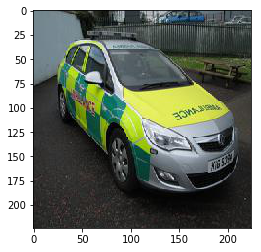

In [6]:
# plot image
plt.imshow(img)

In [6]:
# display image shape
img.shape

(224, 224, 3)

In [7]:
# display a pixel
img[0, 0]

array([115, 134, 141], dtype=uint8)

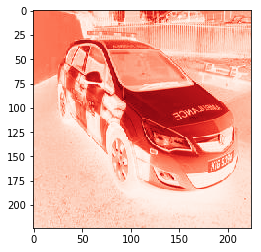

In [8]:
# show red channel
plt.imshow(img[:, :, 0], cmap='Reds') 

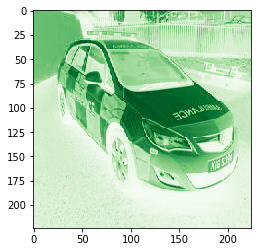

In [9]:
# show green channel
plt.imshow(img[:, :, 1], cmap='Greens')

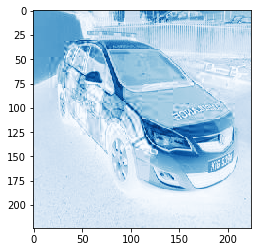

In [10]:
# show blue channel
plt.imshow(img[:, :, 2], cmap='Blues')

In [ ]:
# extract part of image
patch = img[150:150 , 150:200]

# plot part of image
plt.imshow(patch)

In [12]:
# load library
import skimage

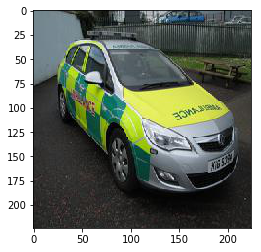

In [13]:
# plot image
plt.imshow(img)

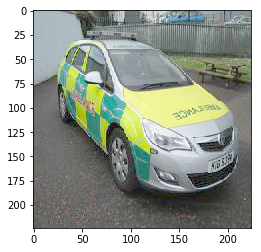

In [14]:
# increase brightness
plt.imshow(skimage.exposure.adjust_gamma(img, 0.5))

## 2. Data Exploration

In [15]:
from glob import glob

In [16]:
images = glob('../datasets/emergency_classification/images/*.jpg')

In [17]:
images

['../datasets/emergency_classification/images/1770.jpg',
 '../datasets/emergency_classification/images/1314.jpg',
 '../datasets/emergency_classification/images/341.jpg',
 '../datasets/emergency_classification/images/1995.jpg',
 '../datasets/emergency_classification/images/951.jpg',
 '../datasets/emergency_classification/images/1082.jpg',
 '../datasets/emergency_classification/images/1278.jpg',
 '../datasets/emergency_classification/images/2087.jpg',
 '../datasets/emergency_classification/images/1943.jpg',
 '../datasets/emergency_classification/images/1391.jpg',
 '../datasets/emergency_classification/images/906.jpg',
 '../datasets/emergency_classification/images/853.jpg',
 '../datasets/emergency_classification/images/111.jpg',
 '../datasets/emergency_classification/images/1515.jpg',
 '../datasets/emergency_classification/images/1031.jpg',
 '../datasets/emergency_classification/images/1495.jpg',
 '../datasets/emergency_classification/images/914.jpg',
 '../datasets/emergency_classificatio

In [18]:
# To stop potential randomness
rng = np.random.RandomState(42)

In [19]:
rng.choice(images)

'../datasets/emergency_classification/images/1156.jpg'

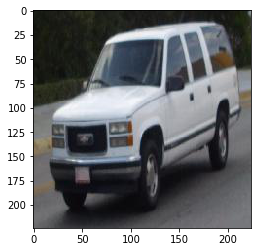

In [20]:
img_name = rng.choice(images)

img = plt.imread(img_name)

plt.imshow(img)

In [21]:
import pandas as pd

In [22]:
data = pd.read_csv('../datasets/emergency_classification/emergency_classification.csv')

In [ ]:
data

In [23]:
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [24]:
data['emergency_or_not'].value_counts()

0    1361
1     991
Name: emergency_or_not, dtype: int64

In [25]:
# Randomly select a row from our data
# Pick out the name of the image
# Read and plot the image
# Pick out the class from the target for the corresponding image
# Print class of the vehicle

It is NOT an emergency vehicle


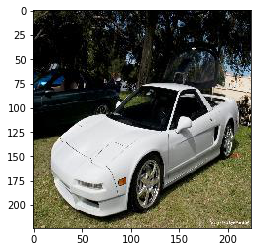

In [26]:
# Randomly select a row from our data
row_index = rng.choice(data.index)

# Pick out name of the image
img_name = data.iloc[row_index]['image_names']

# Read and plot the image
img = plt.imread('../datasets/emergency_classification/images/' + img_name)
plt.imshow(img)

# Pick out class from the target for the corresponding image
target = data.iloc[row_index]['emergency_or_not']

# Print class of the vehicle
if target == 1:
    print('It is an emergency vehicle')
else:
    print('It is NOT an emergency vehicle')

## 3. Data Loading and Preprocessing

In [ ]:
X = []
for img_name in data.image_names:
    img = plt.imread('../datasets/emergency_classification/images/' + img_name)
    X.append(img)
    
X = np.array(X)

In [ ]:
y = data.emergency_or_not.values

In [ ]:
X.shape, y.shape

In [ ]:
X.min(), X.max()

In [ ]:
from keras.applications.vgg16 import preprocess_input

In [ ]:
X = preprocess_input(X, mode='tf')

In [ ]:
X.min(), X.max()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, y, test_size=0.3, random_state=seed)

## 4. Model Building

In [ ]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten, BatchNormalization, Dropout

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg')

In [ ]:
for layer in base_model.layers:
    layer.Trainable = False

In [ ]:
model = Sequential()
model.add(base_model)
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=3, batch_size=128, validation_data=(X_valid, Y_valid))

In [ ]:
predictions = model.predict_classes(X_valid)
prediction_probabilities = model.predict(X_valid)

In [ ]:
predictions.shape

In [ ]:
_, valid_vehicles, _, valid_y = train_test_split(data.image_names.values, y, test_size=0.3, random_state=42)

In [ ]:
correct_predictions = valid_vehicles[predictions[:, 0] == Y_valid]

index = rng.choice(range(len(correct_predictions)))
img_name = correct_predictions[index]

prob = (prediction_probabilities[predictions[:, 0] == Y_valid] * 100).astype(int)[index]

img = imread('../datasets/emergency_classification/images/' + img_name)

print(prob , '% sure that it is emergency')
plt.imshow(img)
plt.show()

In [ ]:
base_model.summary()